<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/prak_3_dan_4_data_mining_safwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import string
import re

In [ ]:
kalimat ="Hari ini saya sedang belajar mengaji di dekat rumah saya. Di TPA saya belajar tajwid dengan judul nun sukun dan tanwin. Nun sukun dan tanwin ada 5 katagori yaitu, izhar halqi, idgham bigunah, idgham bilagunnah, iklab dan ikhfa. Saya sangat suka dengan tajwid izhar halqi."

1. Parsing

In [ ]:
lower_case = kalimat.lower()
print(lower_case)

hari ini saya sedang belajar mengaji di dekat rumah saya. di tpa saya belajar tajwid dengan judul nun sukun dan tanwin. nun sukun dan tanwin ada 5 katagori yaitu, izhar halqi, idgham bigunah, idgham bilagunnah, iklab dan ikhfa. saya sangat suka dengan tajiwd izhar halqi.


In [ ]:
hapus_angka =re.sub(r"/d+", "", lower_case)
print(hapus_angka)

hari ini saya sedang belajar mengaji di dekat rumah saya. di tpa saya belajar tajwid dengan judul nun sukun dan tanwin. nun sukun dan tanwin ada 5 katagori yaitu, izhar halqi, idgham bigunah, idgham bilagunnah, iklab dan ikhfa. saya sangat suka dengan tajiwd izhar halqi.


In [ ]:
hapus_punc = hapus_angka.translate(str.maketrans("", "",string.punctuation))
print(hapus_punc)

hari ini saya sedang belajar mengaji di dekat rumah saya di tpa saya belajar tajwid dengan judul nun sukun dan tanwin nun sukun dan tanwin ada 5 katagori yaitu izhar halqi idgham bigunah idgham bilagunnah iklab dan ikhfa saya sangat suka dengan tajiwd izhar halqi


2. lexical analysis dengn=an token/split

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
tokens = nltk.tokenize.word_tokenize(hapus_punc)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hari', 'ini', 'saya', 'sedang', 'belajar', 'mengaji', 'di', 'dekat', 'rumah', 'saya', 'di', 'tpa', 'saya', 'belajar', 'tajwid', 'dengan', 'judul', 'nun', 'sukun', 'dan', 'tanwin', 'nun', 'sukun', 'dan', 'tanwin', 'ada', '5', 'katagori', 'yaitu', 'izhar', 'halqi', 'idgham', 'bigunah', 'idgham', 'bilagunnah', 'iklab', 'dan', 'ikhfa', 'saya', 'sangat', 'suka', 'dengan', 'tajiwd', 'izhar', 'halqi']


In [ ]:
from nltk.probability import FreqDist
freq_tokens = nltk.FreqDist(tokens)
print(freq_tokens.most_common())

[('saya', 4), ('dan', 3), ('belajar', 2), ('di', 2), ('dengan', 2), ('nun', 2), ('sukun', 2), ('tanwin', 2), ('izhar', 2), ('halqi', 2), ('idgham', 2), ('hari', 1), ('ini', 1), ('sedang', 1), ('mengaji', 1), ('dekat', 1), ('rumah', 1), ('tpa', 1), ('tajwid', 1), ('judul', 1), ('ada', 1), ('5', 1), ('katagori', 1), ('yaitu', 1), ('bigunah', 1), ('bilagunnah', 1), ('iklab', 1), ('ikhfa', 1), ('sangat', 1), ('suka', 1), ('tajiwd', 1)]


In [ ]:
data_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
data_freq_tokens.columns = ['Frekuensi']
data_freq_tokens.index.name = 'Kata'
data_freq_tokens.head(20) #mencetak dengan visual tabel

,Frekuensi
Kata,
hari,1
ini,1
saya,4
sedang,1
belajar,2
mengaji,1
di,2
dekat,1
rumah,1


<Axes: xlabel='Kata'>

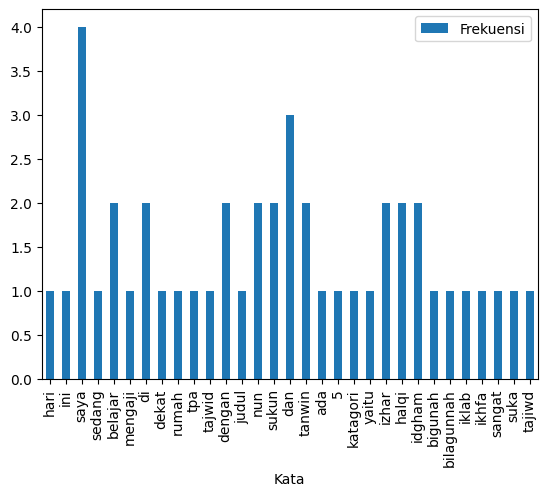

In [ ]:
data_freq_tokens.plot(kind='bar') #mencetak dengan visual grafik

3. stopword removel

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
list_stopwords = set(stopwords.words('indonesian'))
tokens_without_stopword = []
for word in freq_tokens:
  if word not in list_stopwords:
    tokens_without_stopword.append(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(tokens_without_stopword)

['belajar', 'nun', 'sukun', 'tanwin', 'izhar', 'halqi', 'idgham', 'mengaji', 'rumah', 'tpa', 'tajwid', 'judul', '5', 'katagori', 'bigunah', 'bilagunnah', 'iklab', 'ikhfa', 'suka', 'tajiwd']


4. pembentukan kata dasar dengan stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
list_tokens = tokens_without_stopword
output = [(token + " : " + stemmer.stem(token)) for token in list_tokens]
output

['belajar : ajar',
 'nun : nun',
 'sukun : sukun',
 'tanwin : tanwin',
 'izhar : izhar',
 'halqi : halqi',
 'idgham : idgham',
 'mengaji : aji',
 'rumah : rumah',
 'tpa : tpa',
 'tajwid : tajwid',
 'judul : judul',
 '5 : 5',
 'katagori : katagori',
 'bigunah : bigunah',
 'bilagunnah : bilagunnah',
 'iklab : iklab',
 'ikhfa : ikhfa',
 'suka : suka',
 'tajiwd : tajiwd']